In [1]:
#!conda install plotly

In [40]:
import numpy as np 
import pandas as pd 
import time                          
import warnings                      
import matplotlib.pyplot as plt      
import seaborn as sns
import math
import matplotlib.gridspec as gridspec


from sklearn import datasets
from fastcluster import linkage
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn import cluster, mixture
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.cross_validation import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage, single

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
data15 = pd.read_csv("C:\\Users\\yiyuh\\Documents\\College\\Fall 2018\\Stat 517 - Machine Learning\\Project 2 - Stats 517\\World_Happiness_2015.csv")
data16 = pd.read_csv("C:\\Users\\yiyuh\\Documents\\College\\Fall 2018\\Stat 517 - Machine Learning\\Project 2 - Stats 517\\World_Happiness_2016.csv")
data17 = pd.read_csv("C:\\Users\\yiyuh\\Documents\\College\\Fall 2018\\Stat 517 - Machine Learning\\Project 2 - Stats 517\\World_Happiness_2017.csv")

In [4]:
data15=data15.rename(columns={'Economy (GDP per Capita)':'Economy_GDP_Per_Capita','Health (Life Expectancy)':'Health_Life_Expectancy','Trust (Government Corruption)':'Trust_Government_Corruption','Happiness Rank':'Happiness_Rank','Happiness Score':'Happiness_Score'})
data15=data15.sort_values('Happiness_Rank',ascending=False)


In [5]:
data15.isnull().any()

Country                        False
Region                         False
Happiness_Rank                 False
Happiness_Score                False
Standard Error                 False
Economy_GDP_Per_Capita         False
Family                         False
Health_Life_Expectancy         False
Freedom                        False
Trust_Government_Corruption    False
Generosity                     False
Dystopia Residual              False
dtype: bool

In [6]:
data16.isnull().any()

Country                          False
Region                           False
Happiness Rank                   False
Happiness Score                  False
Lower Confidence Interval        False
Upper Confidence Interval        False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                False
dtype: bool

In [7]:
data17.isnull().any()

Country                          False
Happiness.Rank                   False
Happiness.Score                  False
Whisker.high                     False
Whisker.low                      False
Economy..GDP.per.Capita.         False
Family                           False
Health..Life.Expectancy.         False
Freedom                          False
Generosity                       False
Trust..Government.Corruption.    False
Dystopia.Residual                False
dtype: bool

In [8]:
data15.info()
data15.shape
data15.columns
data15.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 157 to 0
Data columns (total 12 columns):
Country                        158 non-null object
Region                         158 non-null object
Happiness_Rank                 158 non-null int64
Happiness_Score                158 non-null float64
Standard Error                 158 non-null float64
Economy_GDP_Per_Capita         158 non-null float64
Family                         158 non-null float64
Health_Life_Expectancy         158 non-null float64
Freedom                        158 non-null float64
Trust_Government_Corruption    158 non-null float64
Generosity                     158 non-null float64
Dystopia Residual              158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 16.0+ KB


Country                         object
Region                          object
Happiness_Rank                   int64
Happiness_Score                float64
Standard Error                 float64
Economy_GDP_Per_Capita         float64
Family                         float64
Health_Life_Expectancy         float64
Freedom                        float64
Trust_Government_Corruption    float64
Generosity                     float64
Dystopia Residual              float64
dtype: object

In [9]:
#data15=data15.rename(columns={'Economy..GDP.per.Capita.':'Economy_GDP_Per_Capita','Health..Life.Expectancy.':'Health_Life_Expectancy','Trust..Government.Corruption.':'Trust_Government_Corruption','Happiness.Rank':'Happiness_Rank','Happiness.Score':'Happiness_Score'})

In [10]:
data15.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard Error', 'Economy_GDP_Per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

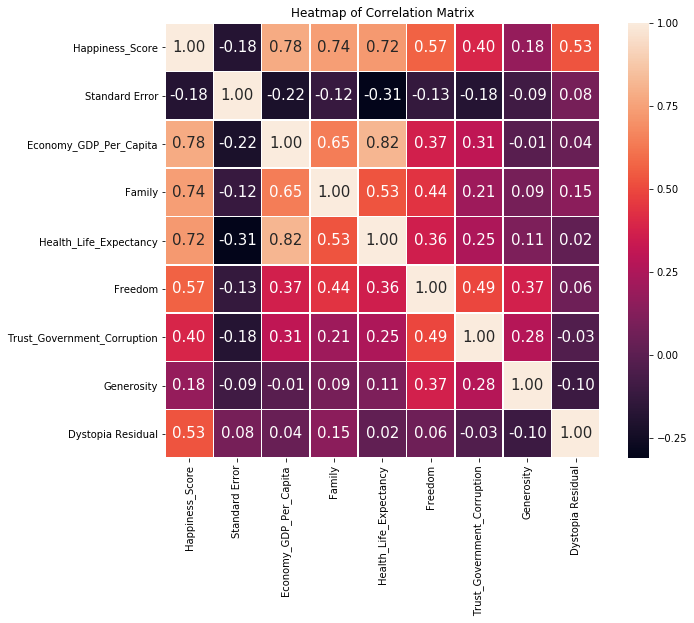

In [11]:
plt.figure(figsize=(10,8))
corr = data15.drop(['Country','Region','Happiness_Rank'],axis = 1).corr()
sns.heatmap(corr, cbar = True, square = True, annot=True, linewidths = .5, fmt='.2f',annot_kws={'size': 15}) 
plt.title('Heatmap of Correlation Matrix')
plt.show()

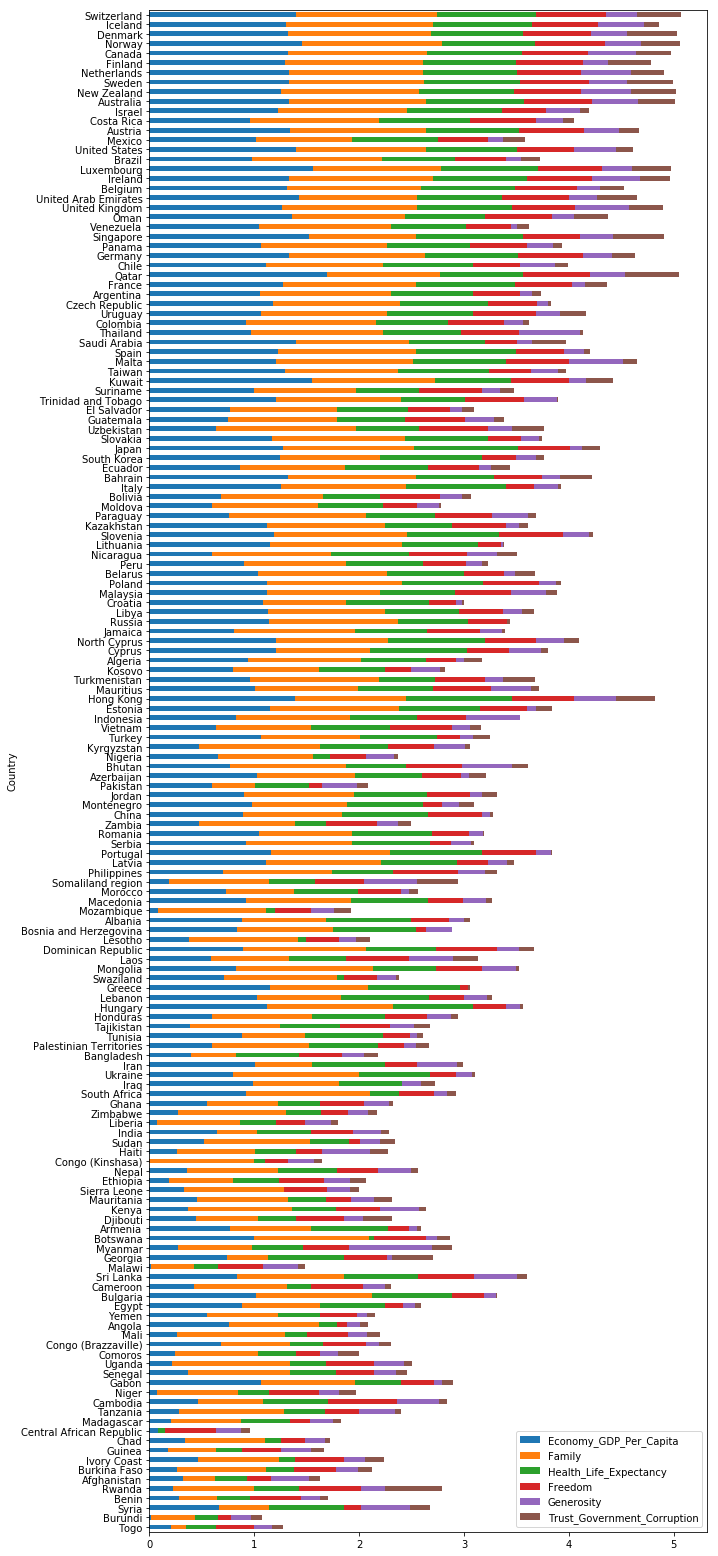

In [12]:
#data15=data15.sort_values('Happiness Rank',ascending=False)
#df_wh=data15.filter(['Country','Economy (GDP Per Capita)','Family','Health Life Expectancy','Freedom','Generosity','Trust (Government Corruption)'])
#df_wh=df_wh.set_index('Country')
#df_wh.plot.barh(stacked=True,  figsize=(10,28))

data15=data15.sort_values('Happiness_Rank',ascending=False)
df_wh=data15.filter(['Country','Economy_GDP_Per_Capita','Family','Health_Life_Expectancy','Freedom','Generosity','Trust_Government_Corruption'])
df_wh=df_wh.set_index('Country')
df_wh.plot.barh(stacked=True,  figsize=(10,28))

In [13]:
df_wh_map = data15
df_wh_map.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard Error,Economy_GDP_Per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042


In [14]:
df_wh_map = data15.reset_index()


In [15]:
#data16 = pd.read_csv("C:\\Users\\yiyuh\\Documents\\College\\Fall 2018\\Stat 517 - Machine Learning\\Project 2 - Stats 517\\World_Happiness_2016.csv")
#data16=data16.rename(columns={'Economy (GDP per Capita)':'Economy_GDP_Per_Capita','Health (Life Expectancy)':'Health_Life_Expectancy','Trust (Government Corruption)':'Trust_Government_Corruption','Happiness Rank':'Happiness_Rank','Happiness Score':'Happiness_Score'})
#data16=data16.sort_values('Happiness_Rank',ascending=False)

#data17 = pd.read_csv("C:\\Users\\yiyuh\\Documents\\College\\Fall 2018\\Stat 517 - Machine Learning\\Project 2 - Stats 517\\World_Happiness_2017.csv")
#data17=data17.rename(columns={'Economy..GDP.per.Capita.':'Economy_GDP_Per_Capita','Health..Life.Expectancy.':'Health_Life_Expectancy','Trust..Government.Corruption.':'Trust_Government_Corruption','Happiness.Rank':'Happiness_Rank','Happiness.Score':'Happiness_Score'})
#data17=data17.sort_values('Happiness_Rank',ascending=False)

In [16]:
X15 = data15.drop(['Happiness_Score', 'Happiness_Rank', 'Country', 'Region'], axis=1)
y15 = data15['Happiness_Score']

Xtrain, Xtest, ytrain, ytest, = train_test_split(X15, y15, random_state=1)


In [17]:
scaler = StandardScaler()

scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [18]:
data15 = pd.get_dummies(data15, columns =[u'Country','Region'])

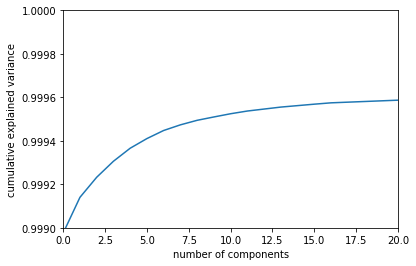

In [19]:
pca = PCA().fit(data15)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axis([0,20,.9990,1.0])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
# By using two components we already have 99% 
# of the cumulative explained variance

In [20]:
pca=PCA(n_components=2)
pca.fit(X15)
X15pca=pca.transform(X15)

In [21]:
data15 = data15.iloc[:, 2: ]      # Ignore Country and Happiness_Rank columns
data15.head(2)

,Standard Error,Economy_GDP_Per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia Residual,Country_Afghanistan,Country_Albania,...,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
157,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,0,0,...,0,0,0,0,0,0,0,0,1,0
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
def kmeans_Clustering(data,numberOfClusters):
       #Initializing Kmeans.cluster object was imported from sklearn in begining.
    kmeans = cluster.KMeans(n_clusters=numberOfClusters)
       # Fitting the input data and getting the cluster labels
    cluster_labels = kmeans.fit_predict(data)
       # Getting the cluster centers
    cluster_centers = kmeans.cluster_centers_
    cluster_centers.shape
    return cluster_labels,cluster_centers

In [23]:
def plot_cluster(labels,centers,df_wh):
    #Getting number of columns
    numOfDimensions = df_wh.columns.size
    #Number of plots required for 6 dimension with 2 dimensions in each plot
    numberOfPlots = int(numOfDimensions/2)
    #Number of rows and columns for subplots
    fig,ax = plt.subplots(numberOfPlots,1, figsize=(10,10))
    for i,j in zip(range(0,numOfDimensions,2),range(0,numberOfPlots)):
        ax[j].scatter(df_wh.iloc[:, i], df_wh.iloc[:, i+1], c=labels, s=50, cmap='viridis')
        ax[j].scatter(centers[:,i], centers[:, i+1], c='black', s=200, alpha=0.5)
        #print(i)
    plt.subplots_adjust(bottom=-0.5, top=1.5)
    plt.show()

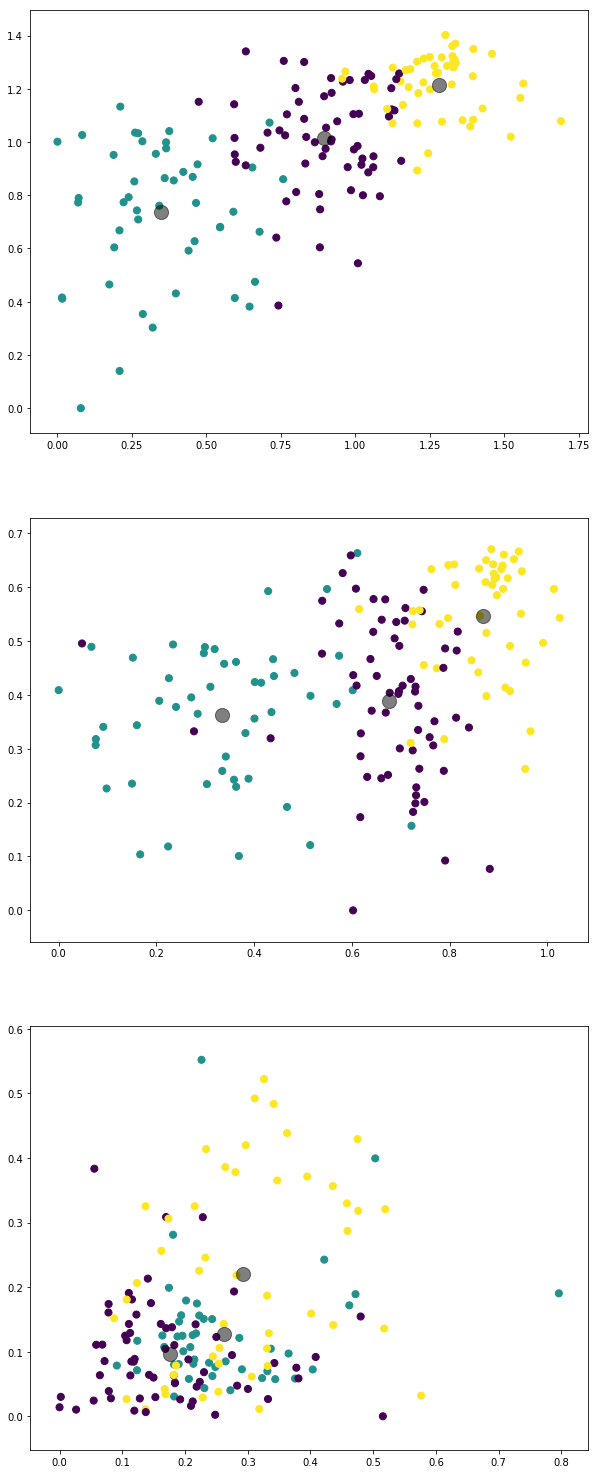

In [24]:
labels,centers = kmeans_Clustering(df_wh,3)     
plot_cluster(labels,centers,df_wh)

In [25]:
# SPECTERAL CLUSTERING 
def spectral_Clustering(data,numberOfClusters):
    #Initializing cluster.cluster object was imported from sklearn in begining.
    spectral = cluster.SpectralClustering(n_clusters=numberOfClusters,affinity="nearest_neighbors",eigen_solver='arpack')
    # Fitting the input data and getting the cluster labels
    cluster_labels = spectral.fit_predict(data)
    # Getting the cluster centers
    return cluster_labels

In [26]:
def plot_clusterWithoutCenter(labels,df_wh):
    #Getting number of columns
    numOfDimensions = df_wh.columns.size
    #Number of plots required for 6 dimension with 2 dimensions in each plot
    numberOfPlots = int(numOfDimensions/2)
    #Number of rows and columns for subplots
    fig,ax = plt.subplots(numberOfPlots,1, figsize=(10,10))
    for i,j in zip(range(0,numOfDimensions,2),range(0,numberOfPlots)):
         ax[j].scatter(df_wh.iloc[:, i], df_wh.iloc[:, i+1], c=labels, s=50, cmap='viridis')
    plt.subplots_adjust(bottom=-0.5, top=1.5)
    plt.show()

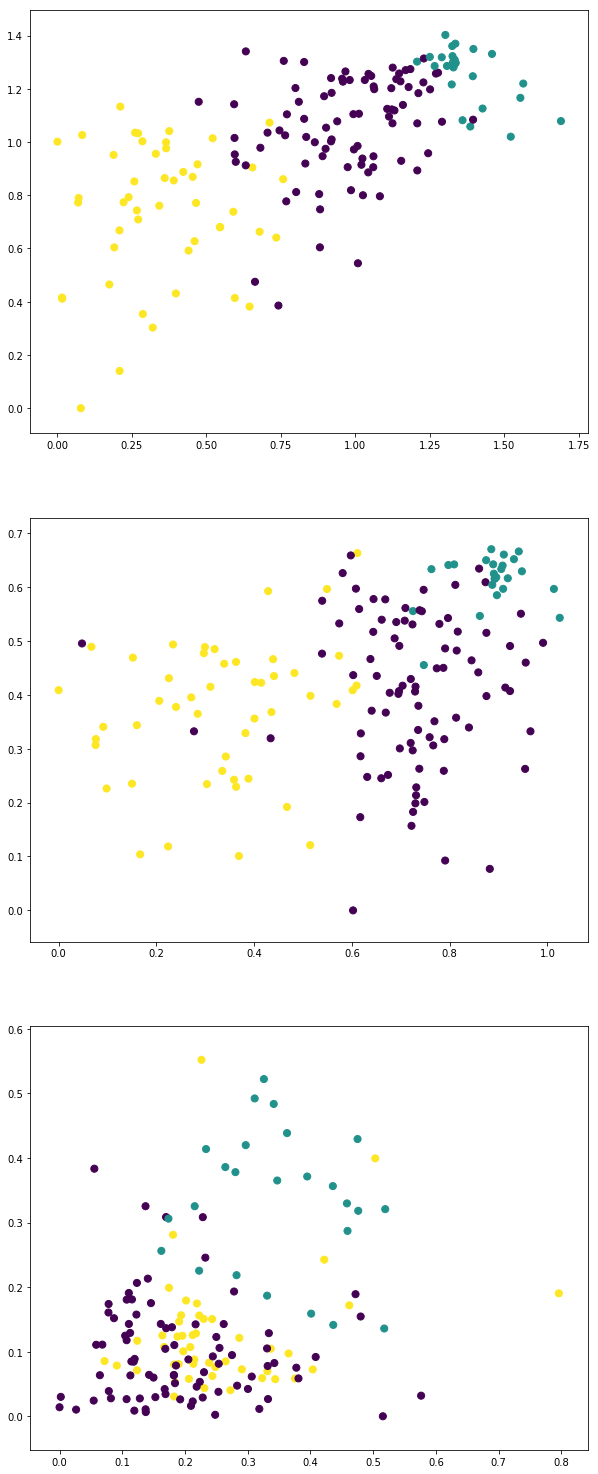

In [27]:
labels = spectral_Clustering(df_wh,3)    
plot_clusterWithoutCenter(labels,df_wh)

In [28]:
from itertools import cycle
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

In [29]:
# Mean Shift Clustering
def meanshift_Cluster(data):
        meanShift = cluster.MeanShift(bandwidth=0.4,bin_seeding=True )
        labels = meanShift.fit_predict(data)
        labels_unique = np.unique(labels)
        n_clusters = len(labels_unique)
        cluster_centers = meanShift.cluster_centers_
        return  labels,cluster_centers,n_clusters

In [30]:
def plotMeanShift(labels,cluster_centers,n_clusters):
    numOfDimensions = df_wh.columns.size
    numberOfPlots = int(numOfDimensions/2)
    fig,ax = plt.subplots(numberOfPlots,1, figsize=(10,10))
    for column,plot in zip(range(0,numOfDimensions,2),range(0,numberOfPlots)):
        for cluster, col in zip(range(n_clusters), colors):
            #This will plot cluster center for first 2 dimensions
            ax[plot].plot(cluster_centers[cluster,column], cluster_centers[cluster,column+1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)
            # we will traverse through cluster labels and if cluster label is equal cluster 0 then it will 
            # plot data point for tht and if cluster label is equal to cluster number 1(k) then it will plot cluster
            # 1 data
            for i in range(labels.size):
                if cluster==labels[i]:
                    ax[plot].plot(df_wh.iloc[i, column], df_wh.iloc[i, column+1], col + '.')
    plt.title('Estimated number of clusters: %d' % n_clusters)
    plt.show()

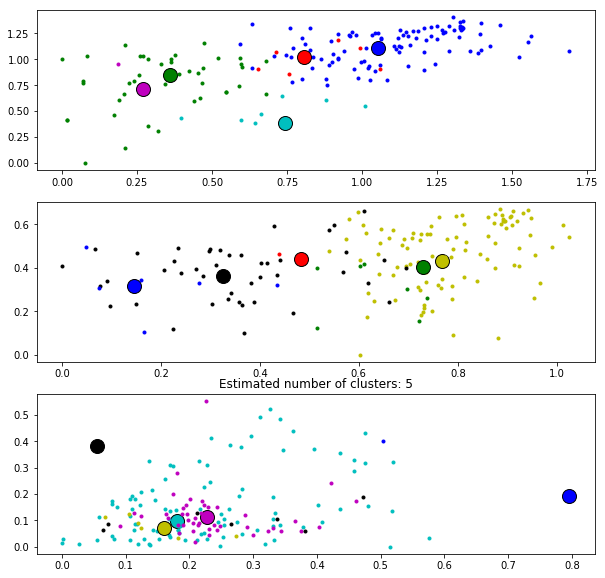

In [31]:
labels,cluster_centers,n_clusters = meanshift_Cluster(df_wh)    
plotMeanShift(labels,cluster_centers,n_clusters)

In [32]:
#Mini batch K means clustering
def minikmeans_Clustering(data,numberOfClusters):
    minikmeans = cluster.MiniBatchKMeans(n_clusters=numberOfClusters, max_iter=100, batch_size=100)
    cluster_labels = minikmeans.fit_predict(data)
    cluster_centers = minikmeans.cluster_centers_
    cluster_centers.shape
    return cluster_labels,cluster_centers

In [33]:
def plot_miniKMeans(mini_labels,mini_centers):
    numberOfClusters=np.unique(mini_labels).size
    #Getting number of columns
    numOfDimensions = df_wh.columns.size
    #number of rows
    numOfRows=len(df_wh.index)
    numberOfPlots = int(numOfDimensions/2)
    #Number of rows and columns for subplots
    colorsArray=['b','g','r']
    #print(type(dbsclabels))
    fig,ax = plt.subplots(numberOfPlots,1, figsize=(10,10))
    for column,pltnum in zip(range(0,numOfDimensions,2),range(0,numberOfPlots)):
        for row in range(0,numberOfClusters):
            colour=colorsArray[np.unique(mini_labels)[row]]
            ax[pltnum].plot(mini_centers[row,column],mini_centers[row,column+1],'o',markerfacecolor=colour,markeredgecolor=colour, markersize=12)
        for row in range(0,numOfRows):
            colour=colorsArray[mini_labels[row]]
            ax[pltnum].plot(df_wh.iloc[row,column],df_wh.iloc[row,column+1],'.',markerfacecolor=colour,markeredgecolor=colour,markersize=4)

    plt.show()

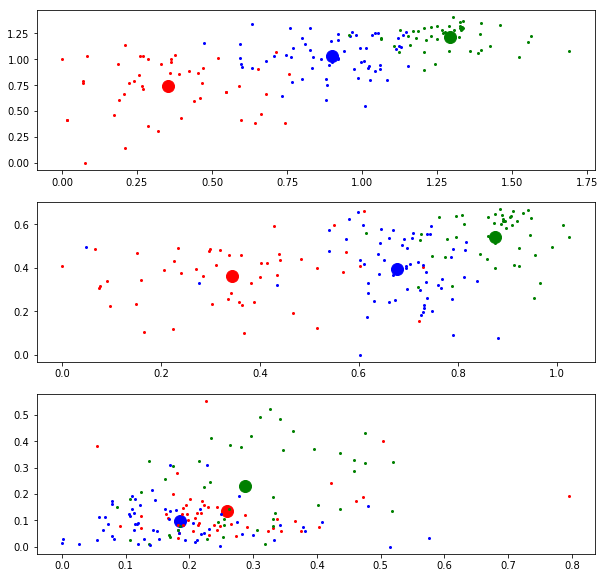

In [34]:
mini_labels,mini_centers=minikmeans_Clustering(df_wh,3)
plot_miniKMeans(mini_labels,mini_centers)


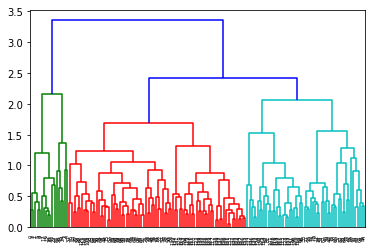

In [50]:
DendrogramComplete= linkage(X15, 'complete')
dn = dendrogram(DendrogramComplete)

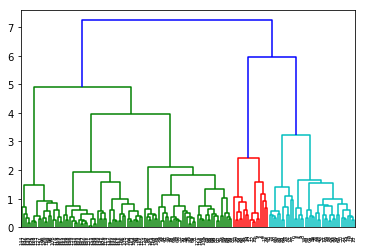

In [52]:
DendrogramWard = linkage(X15, 'ward')
dn = dendrogram(DendrogramWard)

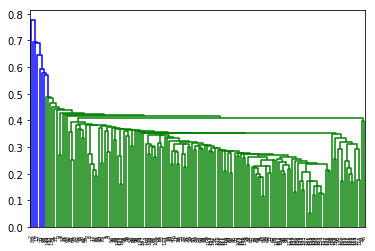

In [53]:
DendrogramSingle = linkage(X15, 'single')
dn = dendrogram(DendrogramSingle)

In [112]:
#Seriation Function from
#https://gmarti.gitlab.io/ml/2017/09/07/how-to-sort-distance-matrix.html
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

In [95]:
data15 = pd.read_csv("C:\\Users\\yiyuh\\Documents\\College\\Fall 2018\\Stat 517 - Machine Learning\\Project 2 - Stats 517\\World_Happiness_2015.csv")
data15 = pd.get_dummies(data15, columns =[u'Country','Region'])
X15 = data15.drop([u'Happiness Rank',u'Happiness Score'], axis=1)

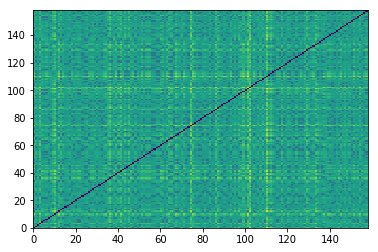

In [99]:
N = len(X15)
X = X15.iloc[np.random.permutation(N),:]

dist_mat = squareform(pdist(X))

plt.pcolormesh(dist_mat)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

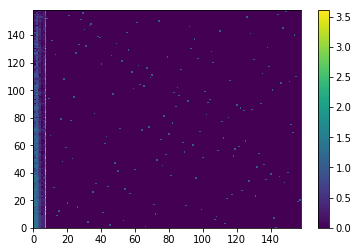

In [97]:
dist_mat = squareform(pdist(X15))

N = len(X15)
plt.pcolormesh(X15)
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

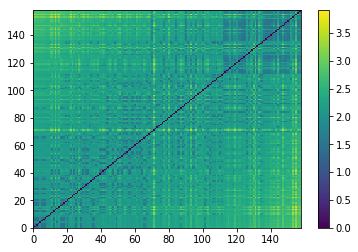

In [111]:
SeriationHappy = X15
SeriationHappy.shape

dist_mat = squareform(pdist(SeriationHappy))

N = len(iris)
plt.pcolormesh(dist_mat)
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

Questions:

1.) "Norway tops the global happiness rankings for all three years 2015, 2016, and 2017"
    Although Norway appears to be within the top 10 every year, it is not the number 1 for all 3 years.
    
2.) "All top ten countries rank highly on all the main features found to support happiness"
    From the model results, the answer is no. There were perhaps a few that were high in each one but not all.
    
3.) "Happiness is both social and personal"
    Due to the fact that there were some countries with low social happiness variables such as government, there were still countries that were happy. And vise versa with personal happiness variables such as a low life expectancy yet still being happy.
    
4.) "Unemployment causes a major fall in happiness, and even for those in work the quality of work can cause major variations in happiness"
    Yes. Unemployment ultimately causes a lower gpd per capita and could have a link with having an unstable government. Although there are no variables stated that directly affect quality of work, I would believe that answer is no.

5.) "China are no happier than most countries, though richer and longer longevity"
    From the models above, the answer is yes.
    
6.) "Much of Africa is struggling"
    Yes, from the clusterings, Africa seemed to be within the lowest 10 happiest countries for all three years.
    
7.) "Happiness has fallen in America"
    Not significantly